# Plotting in Python:  The basics

---

### What does this cover?
1.  Quick plots (less flexibility)
2.  More advanced plots:  the `Figure` and `Axes` objects

... borrowing info from the [pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) and [FAQ](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure) and the [ESS Python Tutorial](https://github.com/raspstephan/ESS-Python-Tutorial/) week 5 directory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# typically not necessary these days, but here for good measure:
% matplotlib inline

# (1) Quick plots

Basic plotting commands might seem familiar if you're used to MATLAB:

* `plt.plot()`

* `plt.contour()` and `plt.contourf()`

* `plt.scatter()`

* `plt.pcolor()` and `plt.pcolormesh()` (faster)

* `plt.hist()`

* ... and a LOT more; see the [gallery](https://matplotlib.org/gallery.html) to start with examples

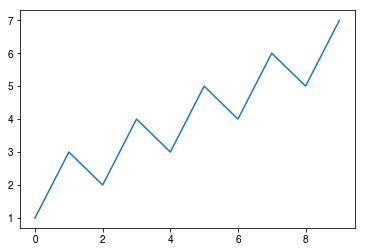

In [2]:
# simplest plot
plt.plot([1,3,2,4,3,5,4,6,5,7])

In [3]:
# set up a few arrays to plot
a = np.array((1,2,3,4,5))
b = np.array((6,7,5,9,13))
c = np.random.rand(10,10) # 10x10 array with random numbers between 0 and 1

#### Add plot title and labels

Text(0.5,1,'Title')

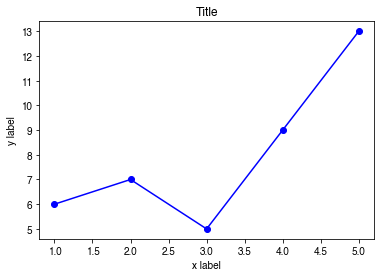

In [4]:
plt.plot(a, b, marker='o', color='blue')
plt.ylabel('y label')
plt.xlabel('x label')
plt.title('Title')

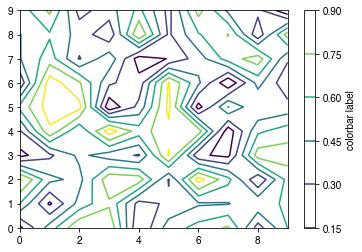

In [5]:
plt.contour(c)
#plt.contourf(c, cmap='magma')
plt.colorbar(label='colorbar label')

---

# (2) More advanced approach

* pyplot figures have four important components, and to make great figures, it's good to know what's going on:

(1) `Figure` class:  the whole thing (one or more Axes, all Artists, and the "canvas")

(2) `Axes` class:  what you think about as the "plot" (belongs to `Figure`)

(3) `Axis` class:  a given horizontal or vertical axis (helps set ticks and other details, belongs to `Axes`)

![Oops, figure not available](fig_map.png)

<br>

(4) `Artist` objects:  ALL the things you see in a figure (the `Figure`, `Axes`, and `Axis`, text, lines, etc.)

![Oops, figure not available](anatomy1.png)

# Recommended (somewhat annoying, but worth it) way to create figures
*Note:  In the "quick plots" demo above, these steps are happening implicitly*
1. Create the `Figure` object using `plt.figure()` function (we'll call it `fig`)
2. Add one or more `Axes` objects to `fig` (call them `ax`, `ax1`, `ax2`, etc.)
3. Use the `ax.plot()` syntax make plots
4. Polish axes using methods that belong to the `Axes` class (documented [here](https://matplotlib.org/api/axes_api.html))

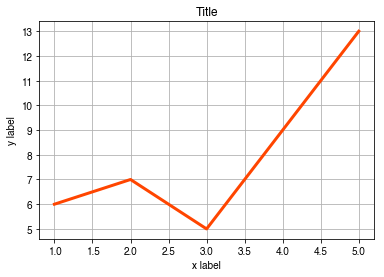

In [6]:
# 1
fig = plt.figure()

# 2
ax = fig.add_subplot(1,1,1) # (rows, columns, current axes)

# 3
ax.plot(a, b, color='orangered', lw=3)

# 4
ax.grid()
ax.set_title('Title')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.tick_params()

#### Alternative approach:  combine steps 1 and 3

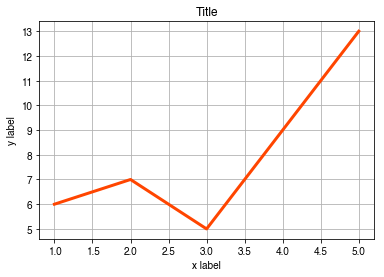

In [7]:
# 1 and 2
fig, ax = plt.subplots(1,1)

# 3
ax.plot(a, b, color='orangered', lw=3)

# 4
ax.grid()
ax.set_title('Title')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.tick_params()

# Review:  Multiple ways to "instantiate" a figure and axes

---

### (1) Basic:  Plotting command uses pyplot directly:  `plt.plot()`, `plt.scatter()`, etc.

#### Creates the figures and axes implicitly

    plt.plot()
    plt.scatter()
    ...

You can get the current fig/ax objects using:  
* `fig = plt.gcf()`
* `ax = plt.gca()`

To change x and y limits, or set axes labels/title, use:  
* `plt.xlim()` and `plt.ylim()`
* `plt.xlabel()`, `plt.ylabel()`, `plt.title()`

---

### (2) Advanced/recommended:  Plotting command uses an `Axes` object:  `ax.plot()`

#### Ceate the `Figure` and `Axes` objects explicitly *beforehand* via either:  
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) # (nrows, ncols, axes index)

**...or...**

    fig, axes = plt.subplots(1,1) # (nrows, ncols)
    
To change x and y limits, or set axes labels/title, use:  
* `ax.set_xlim()`, `ax.set_ylim()`
* `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_title()`
  
A lot of other things are the same... but you'll always encounter exceptions

---

### (3) Hybrid approach:  `plt.axes()`

### This will create the `Axes` object directly, though the `Figure` creation will be implicit

    ax = plt.axes()

* To get `fig`, you can use `fig = plt.gcf()`, where `gcf` = get current figure

---

### Final note:  sizing figures

If you're creating a `fig` object, you can use the syntax below (width, height are in inches):

    plt.figure(figsize=(width,height))

If you've already created the `fig` object, you can resize using:

    fig.set_size_inches(width,height)